<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/%C4%90i%E1%BB%81u_khi%E1%BB%83n_%C4%91%E1%BB%99ng_c%C6%A1_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=facd4c4bd7445a9731a3db2c68357ebe5642b1d501da223d5d8eb6cbcfafad29
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

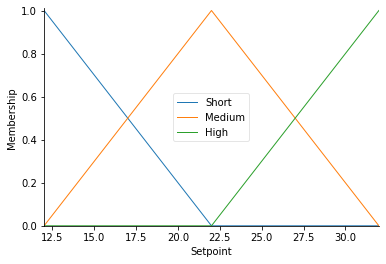

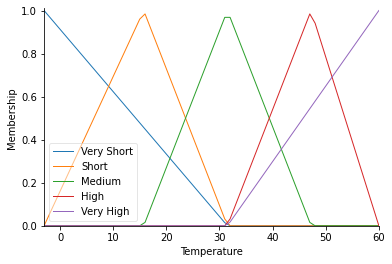

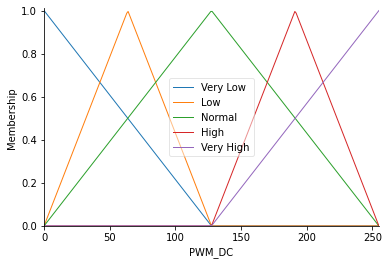

In [16]:
#Temperature
Temperature = ctrl.Antecedent(np.arange(-3,61,1),'Temperature')
Setpoint = ctrl.Antecedent(np.arange(12,33,1),'Setpoint')
PWM_DC = ctrl.Consequent(np.arange(0,256,1),'PWM_DC')

Setpoint['Short']= fuzz.trimf(Setpoint.universe,[12,12,22])
Setpoint['Medium']= fuzz.trimf(Setpoint.universe,[12,22,32])
Setpoint['High']= fuzz.trimf(Setpoint.universe,[22,32,32])
Setpoint.view()


Temperature['Very Short']= fuzz.trimf(Temperature.universe,[-3,-3,31.5])
Temperature['Short']= fuzz.trimf(Temperature.universe,[-3,15.75,31.5])
Temperature['Medium']= fuzz.trimf(Temperature.universe,[15.75,31.5,47.25])
Temperature['High']= fuzz.trimf(Temperature.universe,[31.5,47.25,60])
Temperature['Very High']= fuzz.trimf(Temperature.universe,[31.5,60,60,])
Temperature.view()


PWM_DC['Very Low']= fuzz.trimf(PWM_DC.universe,[0,0,255/2])
PWM_DC['Low']= fuzz.trimf(PWM_DC.universe,[0,255/4,255/2])
PWM_DC['Normal']= fuzz.trimf(PWM_DC.universe,[0,255/2,255])
PWM_DC['High']= fuzz.trimf(PWM_DC.universe,[255/2,255*3/4,255])
PWM_DC['Very High']= fuzz.trimf(PWM_DC.universe,[255/2,255,255])
PWM_DC.view()


rule1 = ctrl.Rule(Setpoint['Short']& Temperature['Very Short'],PWM_DC['Very Low'])
rule2 = ctrl.Rule(Setpoint['Short']& Temperature['Short'],PWM_DC['Normal'])
rule3 = ctrl.Rule(Setpoint['Short']& Temperature['Medium'],PWM_DC['Normal'])
rule4 = ctrl.Rule(Setpoint['Short']& Temperature['High'],PWM_DC['High'])
rule5 = ctrl.Rule(Setpoint['Short']& Temperature['Very High'],PWM_DC['Very High'])

rule6 = ctrl.Rule(Setpoint['Medium']& Temperature['High'],PWM_DC['High'])
rule7 = ctrl.Rule(Setpoint['Medium']& Temperature['Very Short'],PWM_DC['Low'])
rule8 = ctrl.Rule(Setpoint['Medium']& Temperature['Short'],PWM_DC['Normal'])
rule9 = ctrl.Rule(Setpoint['Medium']& Temperature['Medium'],PWM_DC['Normal'])
rule10 = ctrl.Rule(Setpoint['Medium']& Temperature['Very High'],PWM_DC['Very High'])

rule11 = ctrl.Rule(Setpoint['High']& Temperature['Very Short'],PWM_DC['Very Low'])
rule12 = ctrl.Rule(Setpoint['High']& Temperature['Short'],PWM_DC['Low'])
rule13 = ctrl.Rule(Setpoint['High']& Temperature['Medium'],PWM_DC['Normal'])
rule14 = ctrl.Rule(Setpoint['High']& Temperature['High'],PWM_DC['High'])
rule15 = ctrl.Rule(Setpoint['High']& Temperature['Very High'],PWM_DC['Very High'])


123.16223521133665


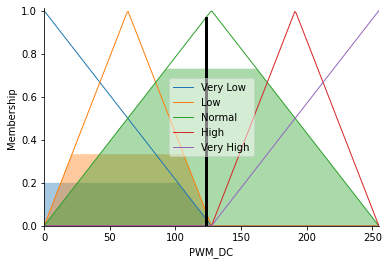

In [19]:
PWM_DC_Out_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWM_DC_Out= ctrl.ControlSystemSimulation(PWM_DC_Out_ctrl)
PWM_DC_Out.input['Temperature']=20
PWM_DC_Out.input['Setpoint']=20
PWM_DC_Out.compute()
print(PWM_DC_Out.output['PWM_DC'])
PWM_DC.view(sim=PWM_DC_Out)